In [171]:
import sys
if sys.version_info[0] < 3:
    raise Exception("Python 3 not detected.")

import numpy as np
import matplotlib as plt
from sklearn import svm
from scipy import io

for data_name in ["mnist", "spam"]:
    data = io.loadmat("%s-data/%s_data.mat" % (data_name,data_name))
    print("\nloaded %s data!" % data_name)
    fields= "test_data", "training_data", "training_labels"
    for field in fields:
        print(field, data[field].shape)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)


In [172]:
## a
# For the MNIST dataset, write code that sets aside 10,000 training images as a validation set.
MNIST_data = io.loadmat("mnist-data/mnist_data.mat")
MNIST_tra = MNIST_data["training_data"]
MNIST_tra_y = MNIST_data["training_labels"]

norm_l2 = np.linalg.norm(MNIST_tra, axis=1, keepdims = True)
MNIST_tra = MNIST_tra/norm_l2

digits = [(np.take(MNIST_tra, np.where(MNIST_tra_y == i)[0], axis = 0)) for i in range(10)]
    
for i in range(10):
    print(digits[i].shape)

(5923, 784)
(6742, 784)
(5958, 784)
(6131, 784)
(5842, 784)
(5421, 784)
(5918, 784)
(6265, 784)
(5851, 784)
(5949, 784)


In [173]:
means, covs = [], []

for digit in digits:
    means.append(np.mean(digit,axis=0))
    
for digit in digits:
    covs.append(np.cov(digit, rowvar=False))

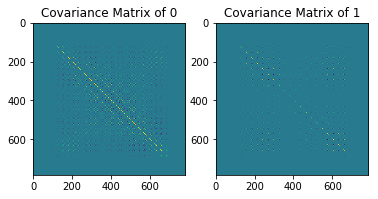

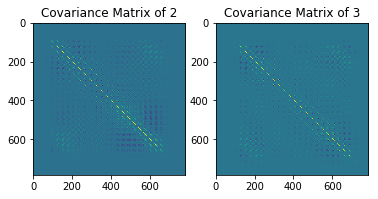

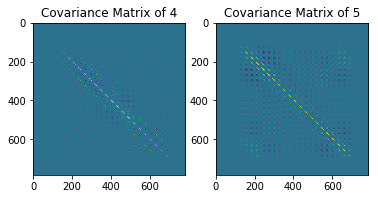

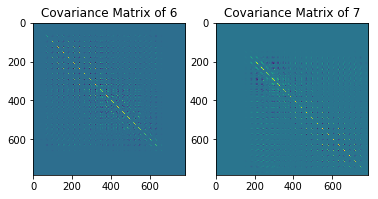

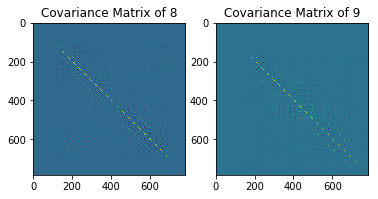

In [174]:
##b wriitten visualization choose class 5
from matplotlib import pyplot as plt
%matplotlib inline

for i in range(0,10,2):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(covs[i])
    plt.title("Covariance Matrix of %s" % str(i))
    plt.subplot(1,2,2)
    plt.imshow(covs[i + 1])
    plt.title("Covariance Matrix of %s" % str(i+1))

In [175]:
## c
import math
from scipy.stats import multivariate_normal
import numpy as np

def shuffleFun(data):
    np.random.shuffle(data)

#shuffle dataset
np.random.seed(58)
MNIST_tra = MNIST_data["training_data"]
shuffleFun(MNIST_tra)
MNIST_x_val = MNIST_tra[:10000]
MNIST_x_train = MNIST_tra[10000:]

np.random.seed(58)
MNIST_tra_y = MNIST_data["training_labels"]
shuffleFun(MNIST_tra_y)
MNIST_y_val = MNIST_tra_y[:10000]
MNIST_y_train = MNIST_tra_y[10000:]

MNIST_test = MNIST_data["test_data"]
#print(np.shape(MNIST_y_train))

In [190]:
def LDA_fun(s_size, num_c, lr, training_x, training_y):
    s_digits = [np.take(training_x[0:s_size],np.where(training_y[0:s_size] == i)[0],axis =0) for i in range(num_c)]
    s_covs = [np.cov(digit,rowvar=0) for digit in s_digits]
    SIG_OVERALL = np.mean(s_covs, axis=0)
    SIG_OVERALL = SIG_OVERALL + math.pow(10,lr) * np.identity(SIG_OVERALL.shape[0])
    s_means = [digit.mean(axis=0) for digit in s_digits]
    s_priors = [digit.shape[0]/s_size for digit in s_digits]
    rv = [multivariate_normal(mean, SIG_OVERALL, allow_singular = True) for mean in s_means]
        
    return rv, s_priors

def QDA_fun(s_size, num_c, lr, training_x, training_y):
    s_digits = [np.take(training_x[0:s_size],np.where(training_y[0:s_size] == i)[0],axis =0) for i in range(num_c)]
    s_covs = [np.cov(digit,rowvar=0) for digit in s_digits]
    SIG_OVERALL = np.mean(s_covs, axis=0)
    SIG_OVERALL = SIG_OVERALL + math.pow(10,lr) * np.identity(SIG_OVERALL.shape[0])
    s_means = [digit.mean(axis=0) for digit in s_digits]
    s_priors = [digit.shape[0]/s_size for digit in s_digits]
    
    rv = [multivariate_normal(means[i], s_covs[i] + math.pow(10,lr)*np.identity(s_covs[i].shape[0]), allow_singular = True) for i in range(num_c)]        
    return rv, s_priors

def predict(rv, s_priors, num_c, validation_set):
    posteriors = []    
    for i in range(num_c):
        posteriors.append(rv[i].logpdf(validation_set) + s_priors[i])
    return np.argmax(posteriors, axis = 0)

def error_rate(y_pred, y_true):
    errors = 0
    for i in range(len(y_true)):
        if y_pred[i] != y_true[i]:
            errors += 1
    e_rate = errors / (len(y_true))
    return e_rate

def error_rate_digit(y_pred, y_true, num):
    errors = 0
    count = 0
    for i,y in enumerate(y_true):
        if y == num:
            count += 1
            if y_pred[i] != y:
                errors += 1
    e_rate = errors / (len(y_true))
    return e_rate

[0.3733]
[0.3733, 0.3111]
[0.3733, 0.3111, 0.6473]
[0.3733, 0.3111, 0.6473, 0.3452]
[0.3733, 0.3111, 0.6473, 0.3452, 0.2328]
[0.3733, 0.3111, 0.6473, 0.3452, 0.2328, 0.1689]
[0.3733, 0.3111, 0.6473, 0.3452, 0.2328, 0.1689, 0.153]
[0.3733, 0.3111, 0.6473, 0.3452, 0.2328, 0.1689, 0.153, 0.1419]
[0.3733, 0.3111, 0.6473, 0.3452, 0.2328, 0.1689, 0.153, 0.1419, 0.1397]


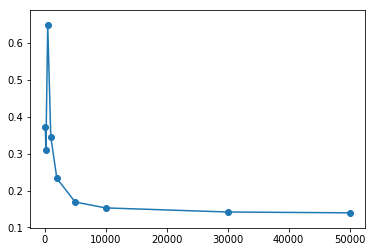

In [191]:
SAMPLES = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
result,result0,result1,result2,result3,result4,result5,result6,result7,result8,result9 = [], [], [], [],[], [],[], [],[], [],[]
#c.1
for sample in SAMPLES:
    rv, s_priors = LDA_fun(sample, 10, -7, MNIST_x_train, MNIST_y_train)
    pred_labels = predict(rv, s_priors, 10, MNIST_x_val)
    result.append(error_rate(pred_labels, MNIST_y_val))
    print(result)
    result0.append(error_rate_digit(pred_labels, MNIST_y_val, 0))
    result1.append(error_rate_digit(pred_labels, MNIST_y_val, 1))
    result2.append(error_rate_digit(pred_labels, MNIST_y_val, 2))
    result3.append(error_rate_digit(pred_labels, MNIST_y_val, 3))
    result4.append(error_rate_digit(pred_labels, MNIST_y_val, 4))
    result5.append(error_rate_digit(pred_labels, MNIST_y_val, 5))
    result6.append(error_rate_digit(pred_labels, MNIST_y_val, 6))
    result7.append(error_rate_digit(pred_labels, MNIST_y_val, 7))
    result8.append(error_rate_digit(pred_labels, MNIST_y_val, 8))
    result9.append(error_rate_digit(pred_labels, MNIST_y_val, 9))
        
plt.scatter(SAMPLES,result)
plt.plot(SAMPLES,result)

Text(0.5,1,'digit9')

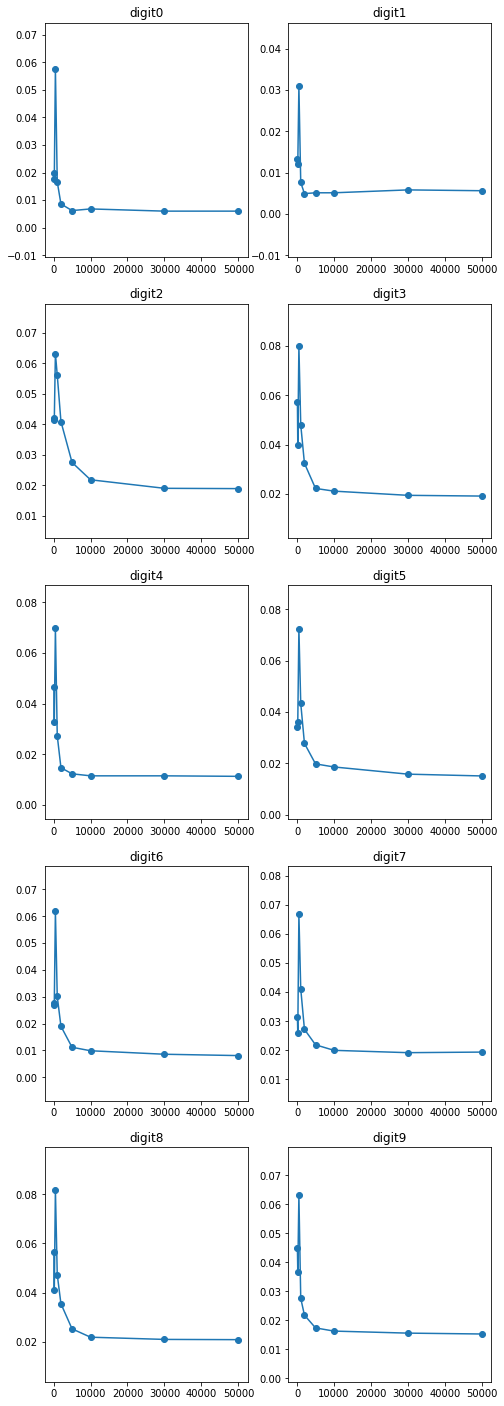

In [227]:
plt.figure(figsize=(8,25))
plt.subplot(5,2,1)
plt.scatter(SAMPLES,result0)
plt.plot(SAMPLES,result0)
plt.title("digit0")

plt.subplot(5,2,2)
plt.scatter(SAMPLES,result1)
plt.plot(SAMPLES,result1)
plt.title("digit1")

plt.subplot(5,2,3)
plt.scatter(SAMPLES,result2)
plt.plot(SAMPLES,result2)
plt.title("digit2")

plt.subplot(5,2,4)
plt.scatter(SAMPLES,result3)
plt.plot(SAMPLES,result3)
plt.title("digit3")

plt.subplot(5,2,5)
plt.scatter(SAMPLES,result4)
plt.plot(SAMPLES,result4)
plt.title("digit4")

plt.subplot(5,2,6)
plt.scatter(SAMPLES,result5)
plt.plot(SAMPLES,result5)
plt.title("digit5")

plt.subplot(5,2,7)
plt.scatter(SAMPLES,result6)
plt.plot(SAMPLES,result6)
plt.title("digit6")

plt.subplot(5,2,8)
plt.scatter(SAMPLES,result7)
plt.plot(SAMPLES,result7)
plt.title("digit7")

plt.subplot(5,2,9)
plt.scatter(SAMPLES,result8)
plt.plot(SAMPLES,result8)
plt.title("digit8")

plt.subplot(5,2,10)
plt.scatter(SAMPLES,result9)
plt.plot(SAMPLES,result9)
plt.title("digit9")

[0.8982]
[0.8982, 0.9699]
[0.8982, 0.9699, 0.861]
[0.8982, 0.9699, 0.861, 0.8894]
[0.8982, 0.9699, 0.861, 0.8894, 0.7266]
[0.8982, 0.9699, 0.861, 0.8894, 0.7266, 0.3943]
[0.8982, 0.9699, 0.861, 0.8894, 0.7266, 0.3943, 0.2035]
[0.8982, 0.9699, 0.861, 0.8894, 0.7266, 0.3943, 0.2035, 0.2052]
[0.8982, 0.9699, 0.861, 0.8894, 0.7266, 0.3943, 0.2035, 0.2052, 0.1977]


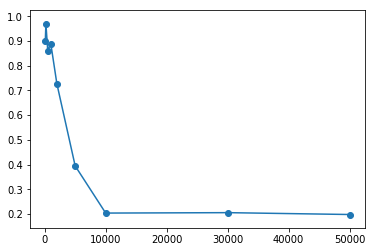

In [231]:
SAMPLES = [100, 200, 500, 1000, 2000, 5000, 10000, 30000, 50000]
result,result0,result1,result2,result3,result4,result5,result6,result7,result8,result9 = [], [], [], [],[], [],[], [],[], [],[]
# c.2
for sample in SAMPLES:
    rv, s_priors = QDA_fun(sample, 10, -6, MNIST_x_train, MNIST_y_train)
    predicted_labels = predict(rv, s_priors, 10, MNIST_x_val)
    result.append(error_rate(predicted_labels, MNIST_y_val))
    print(result)
    result0.append(error_rate_digit(pred_labels, MNIST_y_val, 0))
    result1.append(error_rate_digit(pred_labels, MNIST_y_val, 1))
    result2.append(error_rate_digit(pred_labels, MNIST_y_val, 2))
    result3.append(error_rate_digit(pred_labels, MNIST_y_val, 3))
    result4.append(error_rate_digit(pred_labels, MNIST_y_val, 4))
    result5.append(error_rate_digit(pred_labels, MNIST_y_val, 5))
    result6.append(error_rate_digit(pred_labels, MNIST_y_val, 6))
    result7.append(error_rate_digit(pred_labels, MNIST_y_val, 7))
    result8.append(error_rate_digit(pred_labels, MNIST_y_val, 8))
    result9.append(error_rate_digit(pred_labels, MNIST_y_val, 9))
plt.scatter(SAMPLES,result)
plt.plot(SAMPLES,result)

In [233]:
result0

[0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006, 0.006]

Text(0.5,1,'digit9')

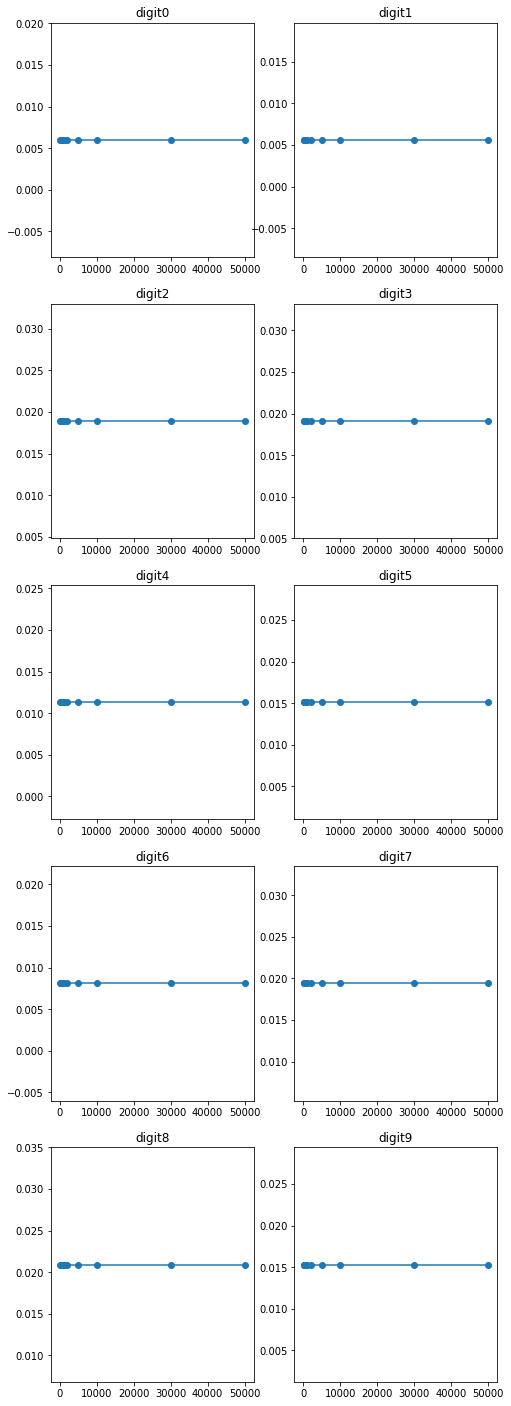

In [232]:
plt.figure(figsize=(8,25))
plt.subplot(5,2,1)
plt.scatter(SAMPLES,result0)
plt.plot(SAMPLES,result0)
plt.title("digit0")

plt.subplot(5,2,2)
plt.scatter(SAMPLES,result1)
plt.plot(SAMPLES,result1)
plt.title("digit1")

plt.subplot(5,2,3)
plt.scatter(SAMPLES,result2)
plt.plot(SAMPLES,result2)
plt.title("digit2")

plt.subplot(5,2,4)
plt.scatter(SAMPLES,result3)
plt.plot(SAMPLES,result3)
plt.title("digit3")

plt.subplot(5,2,5)
plt.scatter(SAMPLES,result4)
plt.plot(SAMPLES,result4)
plt.title("digit4")

plt.subplot(5,2,6)
plt.scatter(SAMPLES,result5)
plt.plot(SAMPLES,result5)
plt.title("digit5")

plt.subplot(5,2,7)
plt.scatter(SAMPLES,result6)
plt.plot(SAMPLES,result6)
plt.title("digit6")

plt.subplot(5,2,8)
plt.scatter(SAMPLES,result7)
plt.plot(SAMPLES,result7)
plt.title("digit7")

plt.subplot(5,2,9)
plt.scatter(SAMPLES,result8)
plt.plot(SAMPLES,result8)
plt.title("digit8")

plt.subplot(5,2,10)
plt.scatter(SAMPLES,result9)
plt.plot(SAMPLES,result9)
plt.title("digit9")

In [136]:
## c.3 written answer

In [145]:
## c.4
# A code snippet to help you save your results into a kaggle accepted csv
import pandas as pd
import numpy as np

# Usage results_to_csv(clf.predict(X_test))
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1  # Ensures that the index starts at 1. 
    df.to_csv('submission.csv', index_label='Id')

In [146]:
posteriors = []
rv, s_priors = LDA_fun(50000, 10, -7, MNIST_x_train, MNIST_y_train)
for i in range(10):
    posteriors.append(rv[i].logpdf(MNIST_test) + s_priors[i])
pred_labels = np.argmax(posteriors,axis = 0)

In [147]:
results_to_csv(pred_labels)

In [148]:
posteriors = []
rv, s_priors = QDA_fun(50000, 10, -6, MNIST_x_train, MNIST_y_train)
for i in range(10):
    posteriors.append(rv[i].logpdf(MNIST_test) + s_priors[i])
pred_labels = np.argmax(posteriors,axis = 0)

In [149]:
results_to_csv(pred_labels)

In [ ]:
### for each digit


In [161]:
## d Using LDA
spam_data = io.loadmat("spam-data/spam_data.mat")
spam_tra = spam_data["training_data"]
spam_tra_y = spam_data["training_labels"]

import math
from scipy.stats import multivariate_normal
import numpy as np

def shuffleFun(data):
    np.random.shuffle(data)

#shuffle dataset
np.random.seed(58)
spam_tra = spam_data["training_data"]
shuffleFun(spam_tra)
spam_x_val = spam_tra[:4172]
spam_x_train = spam_tra[4172:]

np.random.seed(58)
spam_tra_y = spam_data["training_labels"]
shuffleFun(spam_tra_y)
spam_y_val = spam_tra_y[:4172]
spam_y_train = spam_tra_y[4172:]

spam_test = spam_data["test_data"]
#print(np.shape(spam_y_train))

In [165]:
norm_l2 = np.linalg.norm(spam_tra, axis=1, keepdims = True)
spam_tra = spam_tra/norm_l2

digits = [(np.take(spam_tra, np.where(spam_tra_y == i)[0], axis = 0)) for i in range(2)]
    
for i in range(2):
    print(digits[i].shape)
    
means, covs = [], []

for digit in digits:
    means.append(np.mean(digit,axis=0))
    
for digit in digits:
    covs.append(np.cov(digit, rowvar=False))

(3672, 32)
(1500, 32)


C:\Users\zhuwe\AppData\Local\Continuum\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [169]:
posteriors = []
rv, s_priors = LDA_fun(5172, 2, -1, spam_x_train, spam_y_train)
for i in range(2):
    posteriors.append(rv[i].logpdf(spam_test) + s_priors[i])
pred_labels = np.argmax(posteriors,axis = 0)

In [170]:
results_to_csv(pred_labels)